In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# Downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# Data Processing - Loading the data from csv file to pandas dataframe
df = pd.read_csv('../data/twitter_sentiment.csv')

In [5]:
# Checking the number of rows and columns
df.shape

(75681, 4)

In [6]:
# Printing the 5 rows of the dataframe
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Select the last two columns by their position and name the columns
df = df.iloc[:, -2:].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75681 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [9]:
# Counting the number of missing values in the dataset
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [10]:
# Drop the null values
df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

In [11]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20843
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

<Axes: ylabel='count'>

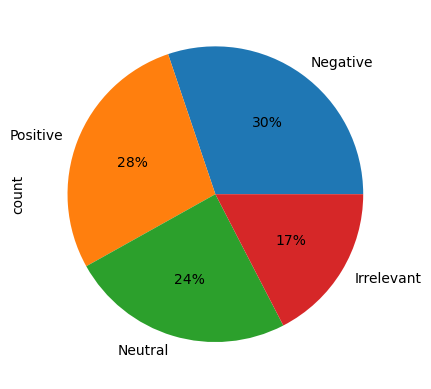

In [12]:
# Pie Chart
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

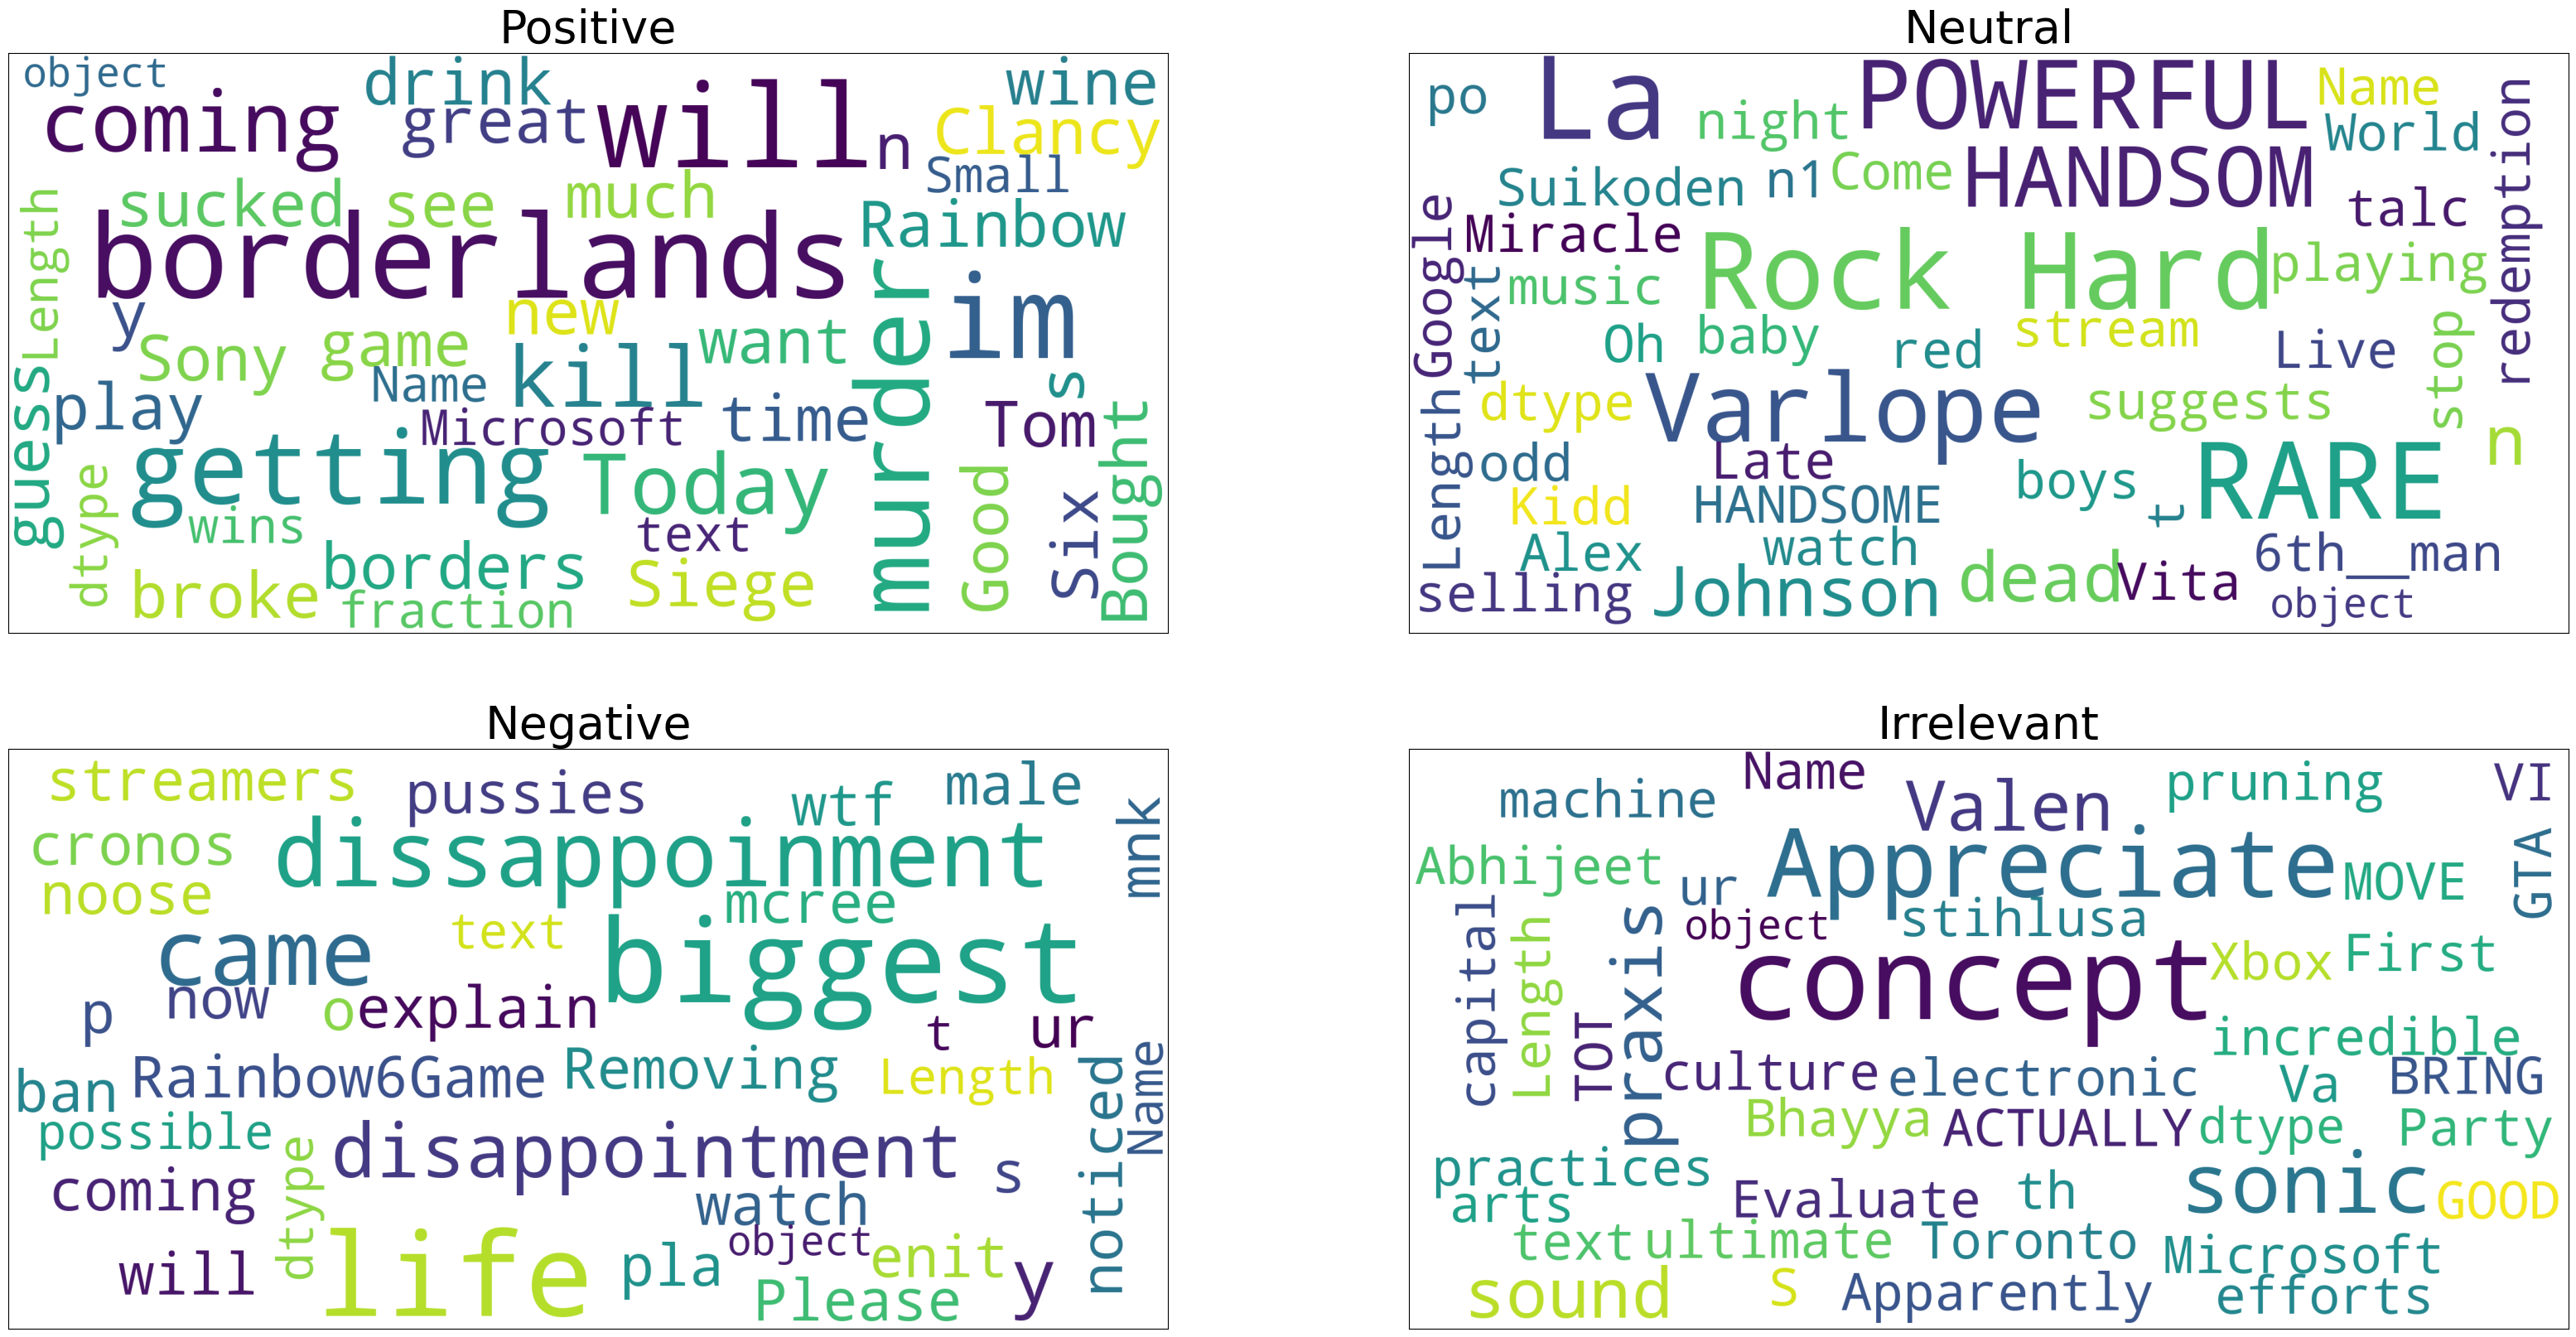

<Figure size 640x480 with 0 Axes>

In [13]:
# Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [14]:
# Data Cleaning
# Lowercase, remove url, html, punctuations, retweet
import re

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

# Function to remove special characters and punctuation
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Function to remove "RT" (retweet tag)
def remove_rt(text):
    return re.sub(r'\brt\b', '', text)

# Applying the cleaning steps
df['text'] = df['text'].str.lower()  # Convert to lowercase
df['text'] = df['text'].apply(remove_urls)  # Remove URLs
df['text'] = df['text'].apply(remove_html_tags)  # Remove HTML tags
df['text'] = df['text'].apply(remove_special_chars)  # Remove special characters/punctuation
df['text'] = df['text'].apply(remove_rt)  # Remove retweet ("RT")

In [15]:
df['text']

0        i am coming to the borders and i will kill you...
1        im getting on borderlands and i will kill you all
2        im coming on borderlands and i will murder you...
3        im getting on borderlands  and i will murder y...
4        im getting into borderlands and i can murder y...
                               ...                        
75676     toronto is the arts and culture capital of ca...
75677    this is actually a good move tot bring more vi...
75678    today sucked so its time to drink wine n play ...
75679      bought a fraction of microsoft today small wins
75680    johnson  johnson to stop selling talc baby pow...
Name: text, Length: 74646, dtype: object

In [16]:
# Separating the data and label
X = df['text'].values
Y = df['sentiment'].values

In [17]:
print(X)

['i am coming to the borders and i will kill you all'
 'im getting on borderlands and i will kill you all'
 'im coming on borderlands and i will murder you all' ...
 'today sucked so its time to drink wine n play borderlands until the sun comes up so i can hate myself all day tomorrow'
 'bought a fraction of microsoft today small wins'
 'johnson  johnson to stop selling talc baby powder in us and canada jmpeytdv reuters ']


In [18]:
print(Y)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Neutral']


In [19]:
# Splitting the data to training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(74646,) (59716,) (14930,)


In [21]:
print(X_train)

['criminal indeed'
 'finally made it into the top  now we need to hold on to it looks like a really good meta for now for pirate warrior with all of the odd dh and quest mage in high legend'
 'minnie in red has unlocked  success in battlefield  v and increased her gamescore to  to  in this game and  in total'
 ...
 'my goodness playoverwatch your matchmaking in america is as stink as shit dick because hes fucking the usa in the the'
 'great day in the park'
 'this is not bill gates vaccine and it wont be mandatory']


In [22]:
print(X_test)

['hell lot of yall dont seem to want being stacked on top of each other in half aisle with masks and no social life in home depot but they wanna bitch on this'
 'me i dont get how my two year old can watch them the same youtube video ten times in a row and not get bored also me assassins creed  looks amazing'
 'talc is cancerous not figuratively but literally causes nausea do not buy any product that contains that'
 ...
 'this event looks awesome if its anything like the predator event from gr wildlands im going to have my hinny handed to me on a silver platter    tom clancys ghost recon breakpoint the terminator event trailer  ubis youtubedgfaafdtips via youtube'
 'i too  m going to really watch this ps event knowing good and well as i  m not even getting one but why dammit i  m having a watch it anyway unk'
 'is it sad that ive ever had a bad day in']


In [23]:
# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Get the stopwords from NLTK as a list
stopwords = stopwords.words('english')

# Create the pipeline: TF-IDF for text transformation, Logistic Regression for classification
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)), 
    ('clf', LogisticRegression(max_iter=1000)) 
])

# Model Training
clf.fit(X_train, Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', LogisticRegression(max_iter=1000))])

In [24]:
# Model Evaluation
from sklearn.metrics import accuracy_score

# Make predictions on the training data
X_train_prediction = clf.predict(X_train)

# Print the accuracy score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [25]:
print('Accuracy score on the training data: ', training_data_accuracy)

Accuracy score on the training data:  0.8628340813182397


In [26]:
# Make predictions on the test data
X_test_prediction = clf.predict(X_test)

# Print the accuracy score
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [27]:
print('Accuracy score on the test data: ', test_data_accuracy)

Accuracy score on the test data:  0.7892833221701273


In [28]:
# Savig the trained model
import pickle

pickle.dump(clf, open('../models/twitter_sentiment.pkl', 'wb'))

Using the saved model for future predictions

In [29]:
# Loading the saved model
loaded_model = pickle.load(open('../models/twitter_sentiment.pkl', 'rb'))

In [30]:
loaded_model.predict(['I hate this math test'])

array(['Negative'], dtype=object)

In [31]:
loaded_model.predict(['happy birthday to you'])

array(['Positive'], dtype=object)

In [32]:
loaded_model.predict(['this is a book'])

array(['Neutral'], dtype=object)

In [33]:
loaded_model.predict(['This person have a age of 38'])

array(['Irrelevant'], dtype=object)

In [34]:
loaded_model.predict(['shut up'])

array(['Negative'], dtype=object)